## Starbucks Customer Segmentation
The following is data simulated by Starbucks modeling customers' spending habbits in relation to different promotions that they have been sent.<br>
**Goal** 
<br>The goal is to get an idea of the different types of customers shopping at Starbucks.<br>

**To Do**
1. pull in data
2. create new dataframe excluding 'person'
3. fill null values of dataframe with 0
4. convert gender column to numeric  -- use pd.get_dummies(data=X, columns=['gender']) instead of OHE for now
5. use Elbow Method to determine number of clusters (use kmeans)
6. predict the data (use agglomerative)
7. join predictions to column
8. use sns.pairplot() to plot the following columns: (set hue to the cluster prediction column)
    - age
    - gender
    - income
    - total_transactions
    - avg_transaction
    - total_transaction_amount
9. create a markdown cell that includes a paragraph describing some insights we can take away about Starbucks' customers

In [1]:
#1
#import data
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_name = 'starbucks_customers.csv'
data = pd.read_csv(file_name)
data.head(5)

,Unnamed: 0,person,discount_total_offers,discount_completion_pct,discount_min_completion_days,discount_max_completion_days,discount_completed_offers,discount_avg_completion_days,discount_avg_net_reward,bogo_total_offers,...,gender,income,member_date,total_transactions,min_transaction_day,max_transaction_day,avg_transaction,total_transaction_amount,median_days_between_purchases,avg_days_between_purchases
0,0,0009655768c64bdeb2e877511632db8f,1.0,1.0,0.0,0.0,1.0,0.0,-8.0,1.0,...,M,72000.000000,2017-04-21,8.0,228.0,696.0,15.950000,127.60,27.0,59.25
1,0,00116118485d4dfda04fdbaba9a87b5c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,U,65404.991568,2018-04-25,3.0,294.0,474.0,1.363333,4.09,18.0,62.00
2,0,0011e0d4e6b944f998e987f904e8c1e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,O,57000.000000,2018-01-09,5.0,132.0,654.0,15.892000,79.46,66.0,105.60
3,0,0020c2b971eb4e9188eac86d93036a77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,F,90000.000000,2016-03-04,8.0,54.0,708.0,24.607500,196.86,21.0,82.50
4,0,0020ccbbb6d84e358d3414a3ff76cffd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F,60000.000000,2016-11-11,12.0,42.0,672.0,12.837500,154.05,30.0,53.00


In [8]:
#2
#create new dataframe excluding 'person'
df2 = deepcopy(data)
df2.drop(['person'], axis = 1, inplace = True)
df2.head(5)



,Unnamed: 0,discount_total_offers,discount_completion_pct,discount_min_completion_days,discount_max_completion_days,discount_completed_offers,discount_avg_completion_days,discount_avg_net_reward,bogo_total_offers,bogo_completion_pct,...,gender,income,member_date,total_transactions,min_transaction_day,max_transaction_day,avg_transaction,total_transaction_amount,median_days_between_purchases,avg_days_between_purchases
0,0,1.0,1.0,0.0,0.0,1.0,0.0,-8.0,1.0,1.0,...,M,72000.000000,2017-04-21,8.0,228.0,696.0,15.950000,127.60,27.0,59.25
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,U,65404.991568,2018-04-25,3.0,294.0,474.0,1.363333,4.09,18.0,62.00
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,O,57000.000000,2018-01-09,5.0,132.0,654.0,15.892000,79.46,66.0,105.60
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,F,90000.000000,2016-03-04,8.0,54.0,708.0,24.607500,196.86,21.0,82.50
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,F,60000.000000,2016-11-11,12.0,42.0,672.0,12.837500,154.05,30.0,53.00


In [9]:
#3
#fill null values in dataframe with 0
df2.fillna(0, inplace = True)
df2.head(5)

,Unnamed: 0,discount_total_offers,discount_completion_pct,discount_min_completion_days,discount_max_completion_days,discount_completed_offers,discount_avg_completion_days,discount_avg_net_reward,bogo_total_offers,bogo_completion_pct,...,gender,income,member_date,total_transactions,min_transaction_day,max_transaction_day,avg_transaction,total_transaction_amount,median_days_between_purchases,avg_days_between_purchases
0,0,1.0,1.0,0.0,0.0,1.0,0.0,-8.0,1.0,1.0,...,M,72000.000000,2017-04-21,8.0,228.0,696.0,15.950000,127.60,27.0,59.25
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,U,65404.991568,2018-04-25,3.0,294.0,474.0,1.363333,4.09,18.0,62.00
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,O,57000.000000,2018-01-09,5.0,132.0,654.0,15.892000,79.46,66.0,105.60
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,F,90000.000000,2016-03-04,8.0,54.0,708.0,24.607500,196.86,21.0,82.50
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,F,60000.000000,2016-11-11,12.0,42.0,672.0,12.837500,154.05,30.0,53.00


In [10]:
#4
#convert gender column to numeric
df2 = pd.get_dummies(data=df2, columns=['gender'])
df2.head(5)

,Unnamed: 0,discount_total_offers,discount_completion_pct,discount_min_completion_days,discount_max_completion_days,discount_completed_offers,discount_avg_completion_days,discount_avg_net_reward,bogo_total_offers,bogo_completion_pct,...,min_transaction_day,max_transaction_day,avg_transaction,total_transaction_amount,median_days_between_purchases,avg_days_between_purchases,gender_F,gender_M,gender_O,gender_U
0,0,1.0,1.0,0.0,0.0,1.0,0.0,-8.0,1.0,1.0,...,228.0,696.0,15.950000,127.60,27.0,59.25,0,1,0,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,294.0,474.0,1.363333,4.09,18.0,62.00,0,0,0,1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.0,654.0,15.892000,79.46,66.0,105.60,0,0,1,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,54.0,708.0,24.607500,196.86,21.0,82.50,1,0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,672.0,12.837500,154.05,30.0,53.00,1,0,0,0


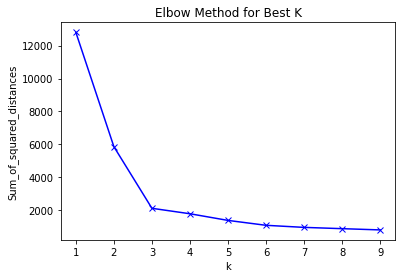

In [11]:
#5

#drop member_date
df2.drop(['member_date'], axis = 1, inplace = True)

#use Elbow method to determine k clusters
scaler=MinMaxScaler()
features = df2[['age', 'gender_F', 'gender_M', 'gender_O', 'gender_U', 'income', 'total_transactions', 'avg_transaction','total_transaction_amount']]
scaler.fit(features)
data_transformed = scaler.transform(features)


SSD = []
K = range (1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    SSD.append(km.inertia_)
    
plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Best K')
plt.show()

In [12]:
#6 predict data, use agglomerative and join predictions

model = AgglomerativeClustering(n_clusters = 3)
features['cluster_prediction'] = model.fit_predict(features)
print(model.labels_)


[2 2 0 ... 0 0 2]


/Users/Evan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


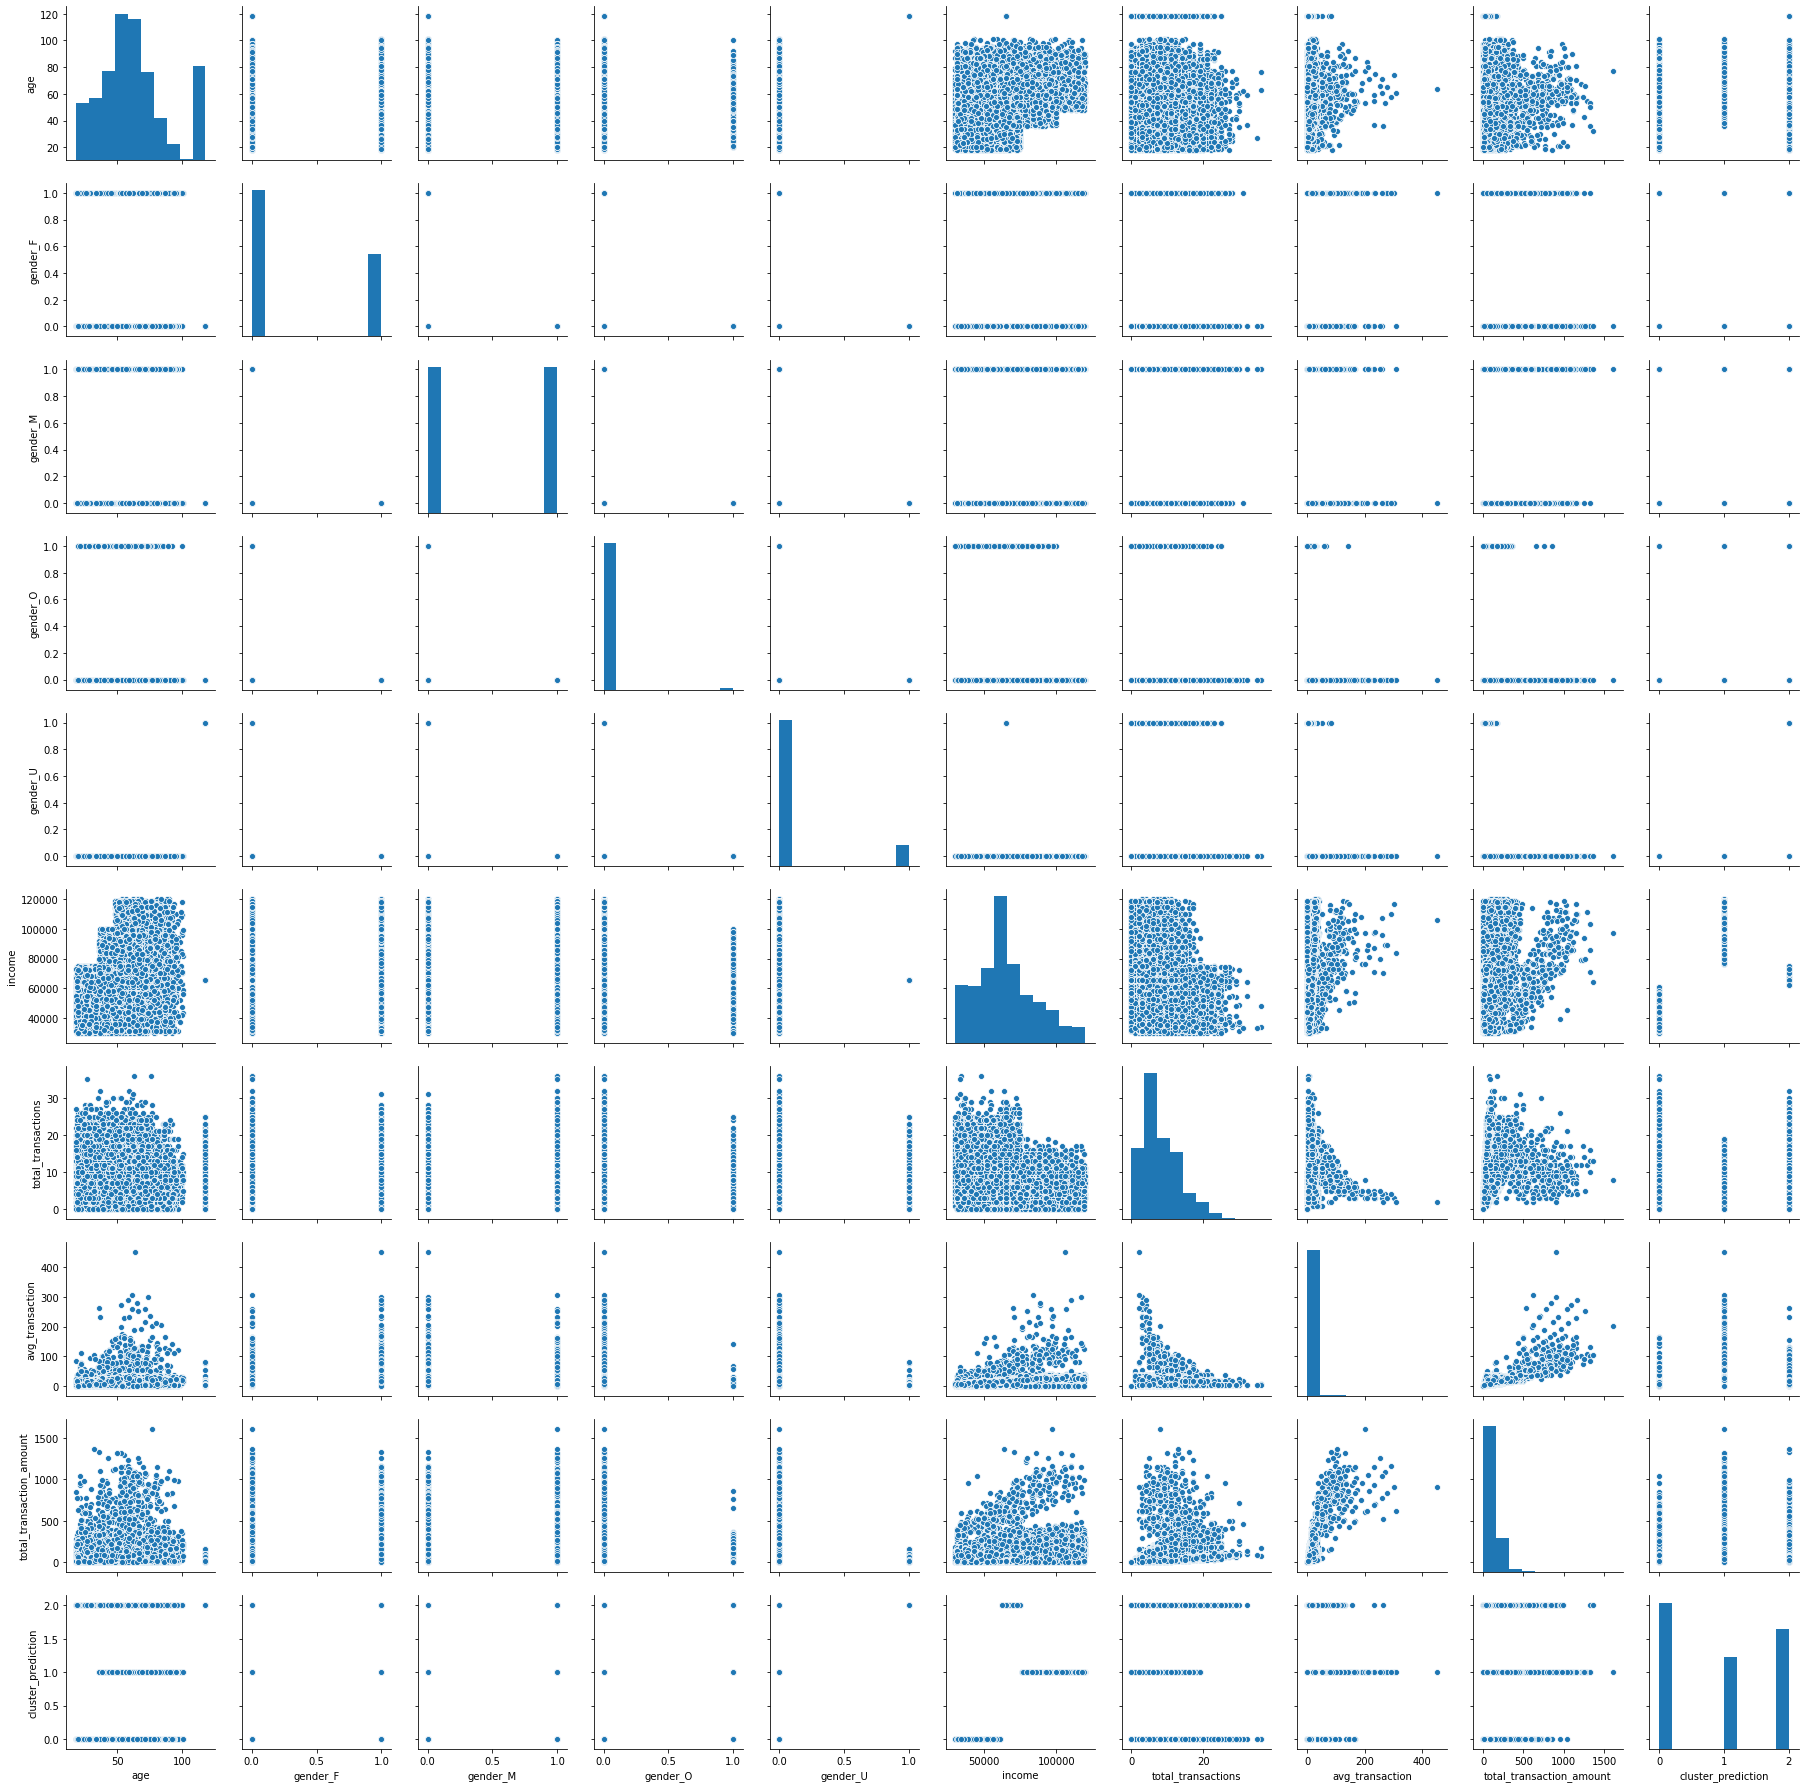

In [13]:
#8 use sns.pairplot() to plot columns
sns.pairplot(features)

/Users/Evan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Evan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


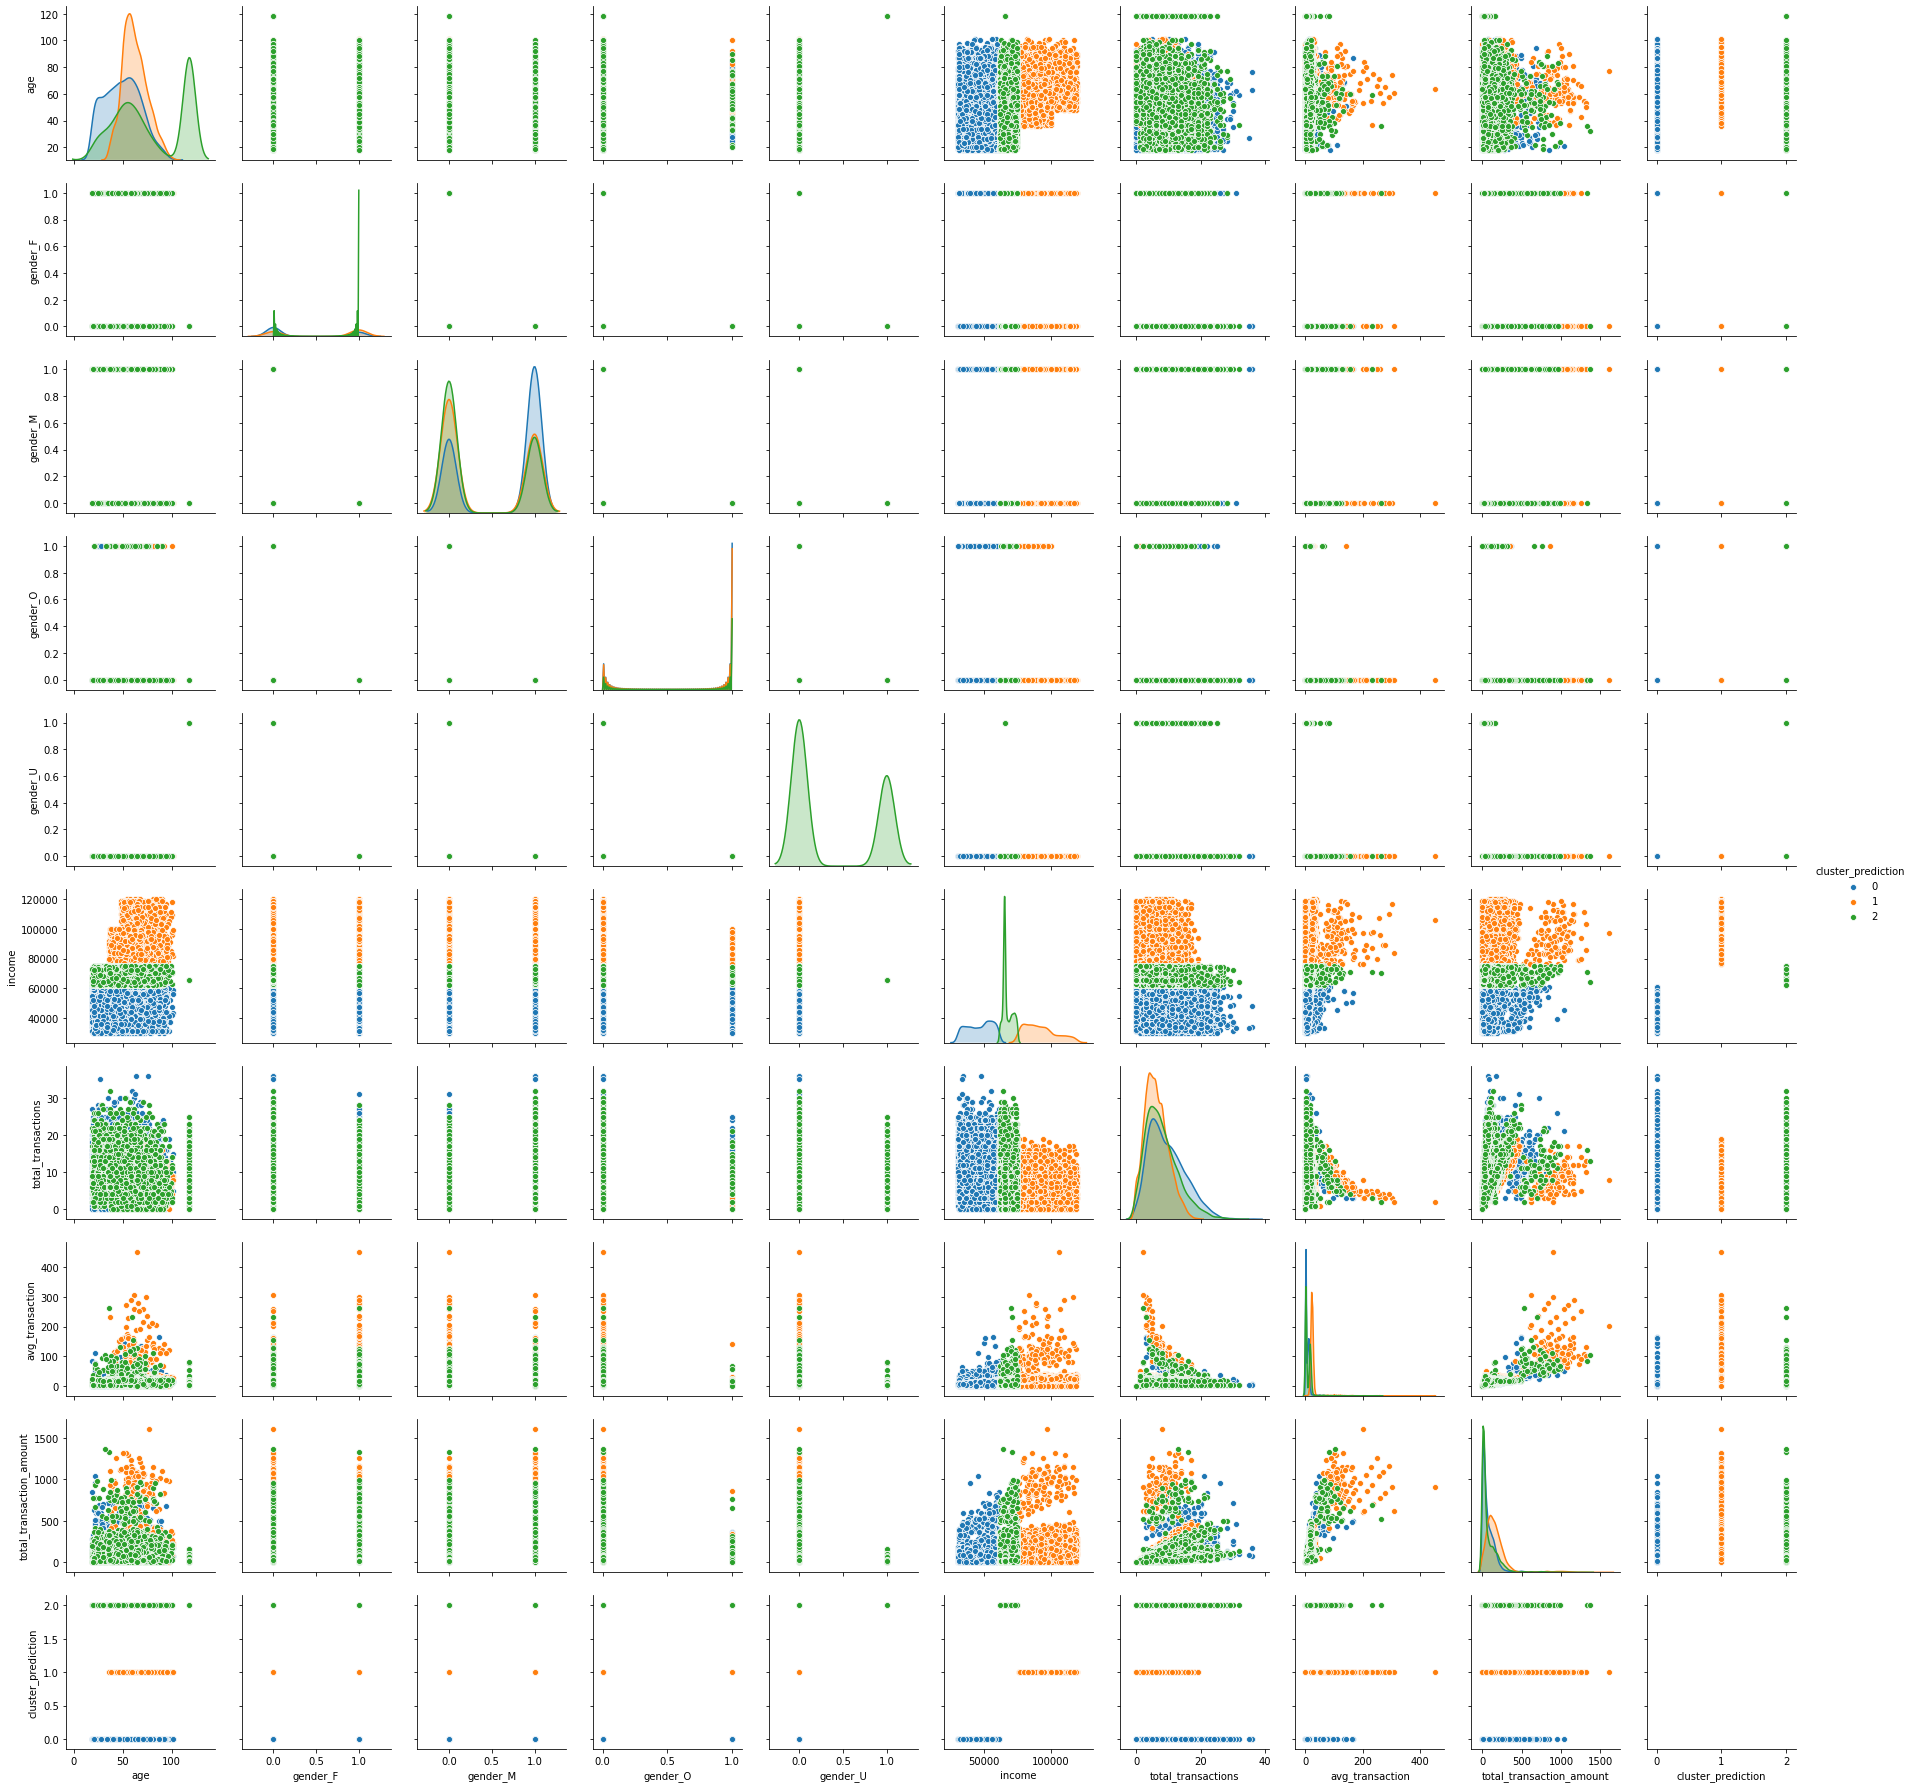

In [15]:
#9 pairplot

sns.pairplot(features, hue='cluster_prediction')

The mean age of Starbucks customers for this dataset is 62.5 years old. The average transaction costs $13.34. The average income of Starbucks customers is $65404.99. The optimal number of k clusters was three in this case when using the Elbow Method. There is a positive correlation between income and average transaction. Most customers were men which is suprising. Lower income people spend less on average than higher income people. 